#### Logarithmic scale


You can implement a logarithmic scale for either one or both axes in Matplotlib. This feature is a specific application of a broader transformation system in Matplotlib. Individual axis scales are configured independently using the 'set_xscale' and 'set_yscale' methods, each accepting a parameter (in this case, the value "log").

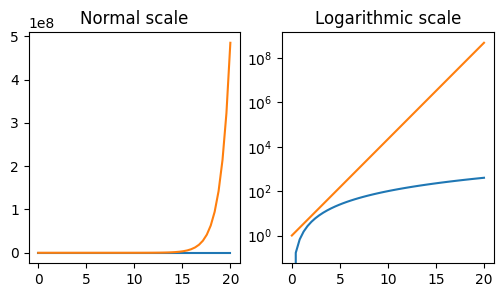

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(0,20)

fig, axes = plt.subplots(1, 2, figsize=(6,3))

axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale");

### Placement of ticks and custom tick labels

We can explicitly specify the desired locations for the axis ticks. Additionally, we have the option to furnish a custom list of text labels for each tick location.

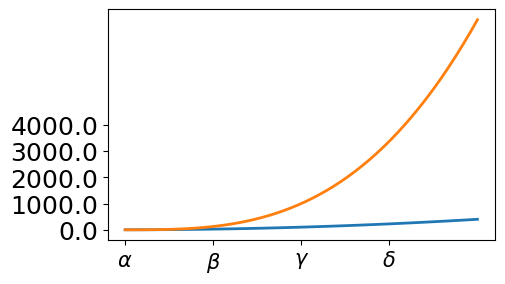

In [18]:
fig, ax = plt.subplots(figsize=(5, 3))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([0, 5, 10, 15])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$'], fontsize=15)

yticks = [0, 1000, 2000, 3000, 4000]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels

#### Scientific notation

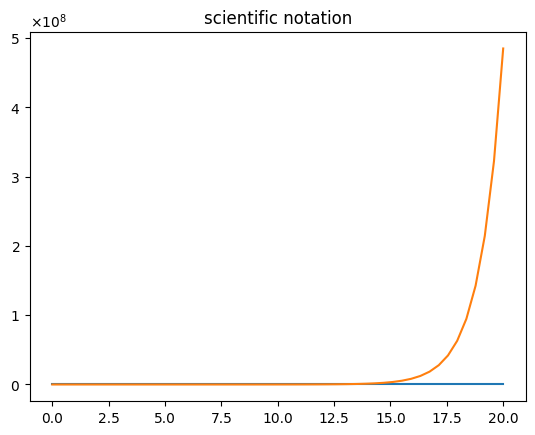

In [22]:
fig, ax = plt.subplots(1, 1)

ax.plot(x, x**2, x, np.exp(x))
ax.set_title("scientific notation")

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1,1))
ax.yaxis.set_major_formatter(formatter)

### Axis grid

With the `grid` method in the axis object, we can turn on and off grid lines. We can also customize the appearance of the grid lines using the same keyword arguments as the `plot` function:

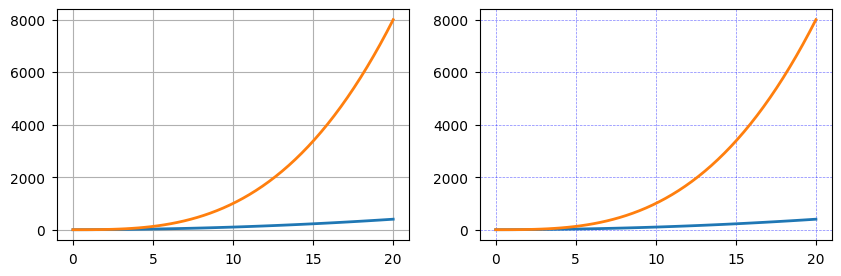

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

### Axis spines

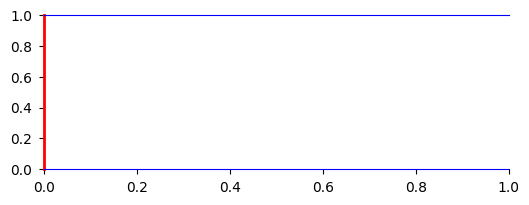

In [28]:
fig, ax = plt.subplots(figsize=(6,2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)

# turn off axis spine to the right
ax.spines['right'].set_color("none")
ax.yaxis.tick_left() # only ticks on the left side

### Twin axes

Occasionally, having two x or y axes in a figure can be beneficial, especially when plotting curves with distinct units simultaneously.

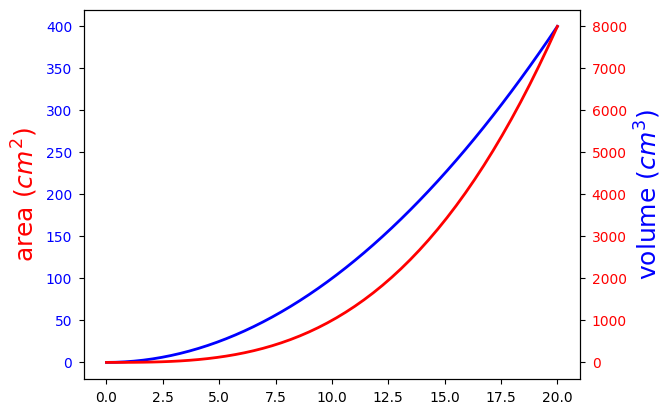

In [31]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(cm^2)$", fontsize=18, color="red")
for label in ax1.get_yticklabels():
    label.set_color("blue")

ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(cm^3)$", fontsize=18, color="blue")
for label in ax2.get_yticklabels():
    label.set_color("red")

### Plot involves all quadrants

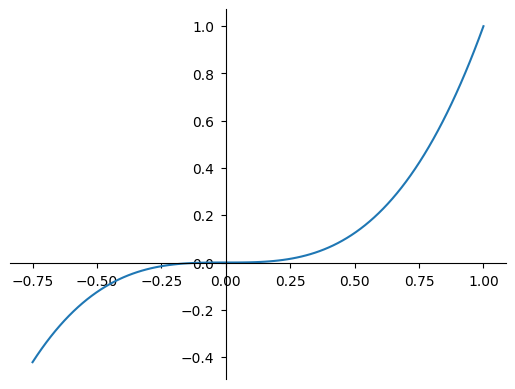

In [32]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

### Different types of 2D plots

In [35]:
n = np.arange(0,20,2)

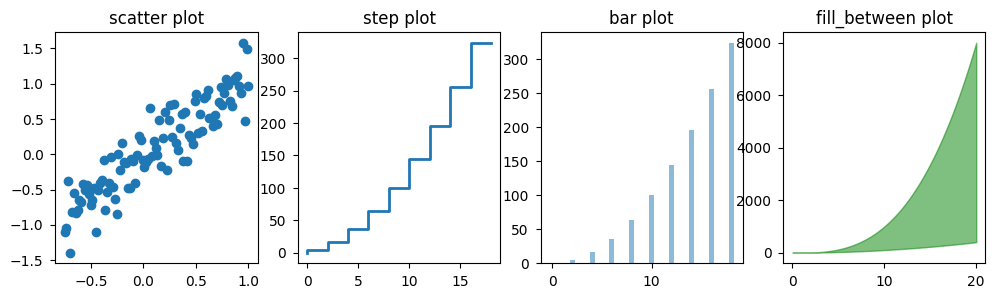

In [37]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter plot")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step plot")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar plot")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between plot");

### Text annotation

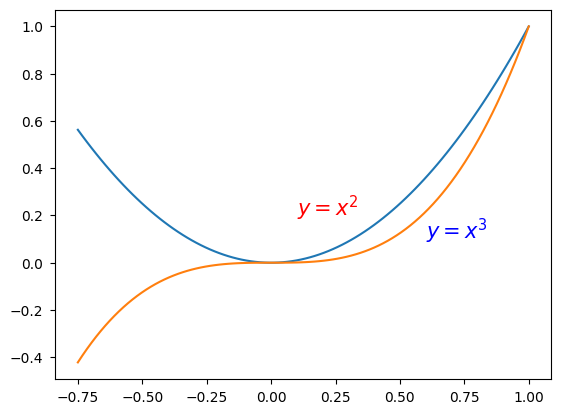

In [40]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.10, 0.2, r"$y=x^2$", fontsize=15, color="red")
ax.text(0.60, 0.1, r"$y=x^3$", fontsize=15, color="blue");

### Figures with multiple subplots and insets

Axes can be added to a matplotlib Figure canvas manually using `fig.add_axes` or using a sub-figure layout manager such as `subplots`, `subplot2grid`, or `gridspec`:

#### subplots

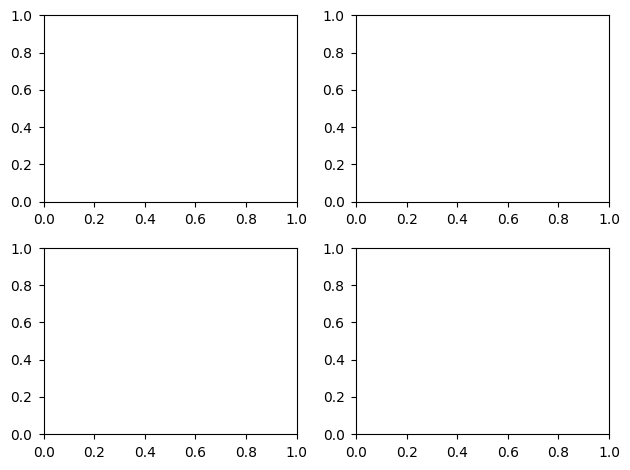

In [41]:
fig, ax = plt.subplots(2, 2)
fig.tight_layout()

#### subplot with different canvas size

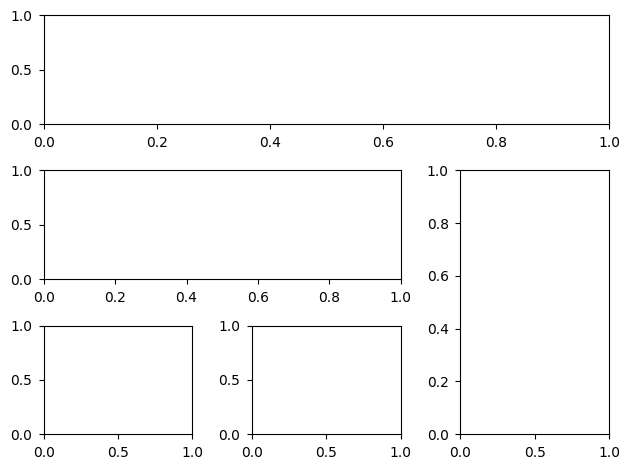

In [42]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

#### gridspec method

The gridspec method in Matplotlib facilitates the creation of complex subplot layouts within a figure. It allows for precise control over the size and arrangement of subplots in a grid, enhancing flexibility in designing multi-plot visualizations.

In [43]:
import matplotlib.gridspec as gridspec

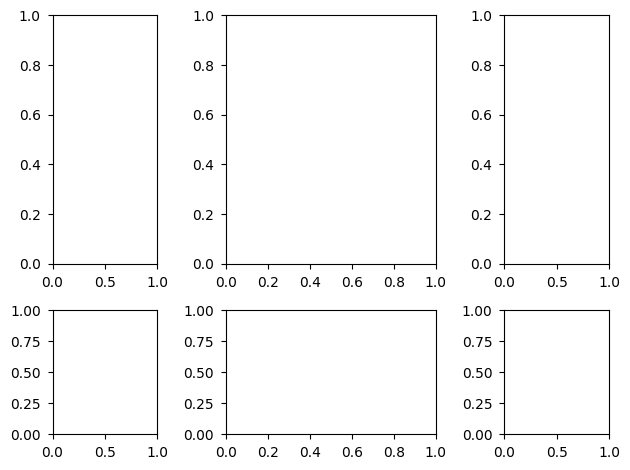

In [45]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)

fig.tight_layout()

#### add_axes for nested plots

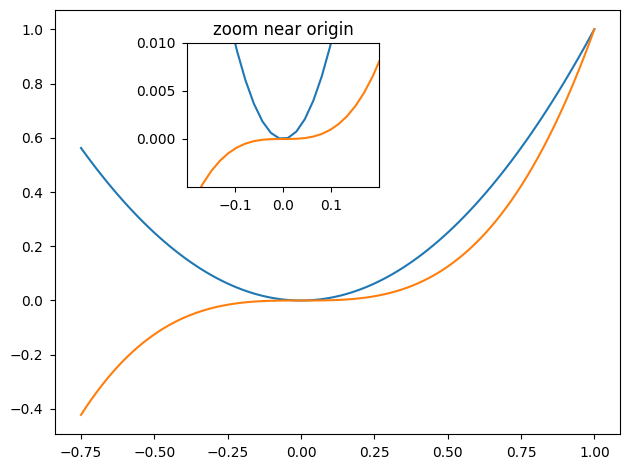

In [50]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inset
inset_ax = fig.add_axes([0.3, 0.6, 0.3, 0.3]) # X, Y, width, height

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('zoom near origin')

# set axis range
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# set axis tick locations
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

## 3D figures

Incorporating 3D graphics in matplotlib involves initiating an instance of the Axes3D class. The addition of 3D axes to a matplotlib figure canvas mirrors the process for 2D axes. Alternatively, it can be conveniently achieved by utilizing the projection='3d' keyword argument with the add_axes or add_subplot methods.

In [56]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

#### Surface plots

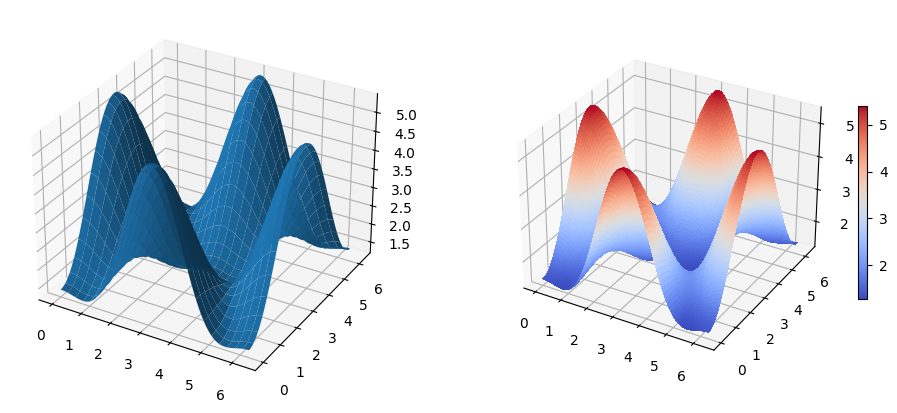

In [59]:
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

#### Wire-frame plot

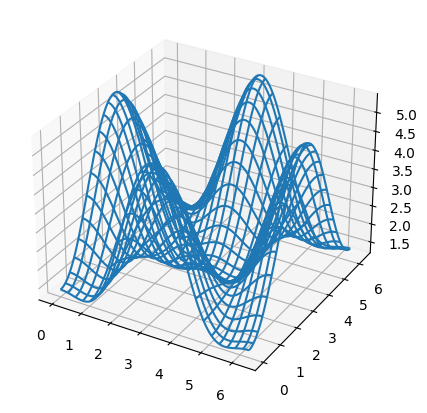

In [60]:
fig = plt.figure(figsize=(7,5))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

#### Coutour plots with projections

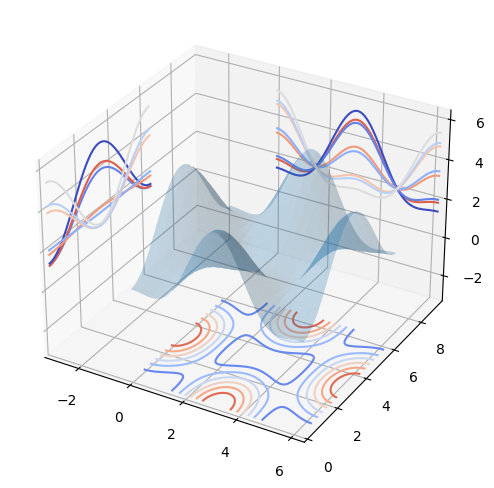

In [61]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=plt.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=plt.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=plt.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);